# Data Information

### Attribute information:

Input variables:
- age (numeric)
- job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 
- marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
- education (categorical: "unknown","secondary","primary","tertiary")
- default: has credit in default? (binary: "yes","no")
- balance: average yearly balance, in euros (numeric) 
- housing: has housing loan? (binary: "yes","no")
- loan: has personal loan? (binary: "yes","no")
- contact: contact communication type (categorical: "unknown","telephone","cellular")
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- duration: last contact duration, in seconds (numeric)
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
   
Output variable (desired target):
- y: has the client subscribed a term deposit? (binary: "yes","no")

# Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("bank-full.csv", sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Understanding the dataset

In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
cols = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'campaign',
       'previous', 'poutcome', 'y']

In [6]:
for col in cols:
    print("="*20, col, "="*20)
    print(df[col].value_counts())

==================== job ====================
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
==================== marital ====================
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
==================== education ====================
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
==================== default ====================
no     44396
yes      815
Name: default, dtype: int64
==================== housing ====================
yes    25130
no     20081
Name: housing, dtype: int64
==================== loan ====================
no     37967
yes     7244
Name: loan, dtype: int64
==================== contact ====================
cellular     29285
u

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### There are many -1 values in pdays, but that is because -1 is given for any customer who was not previously contacted.

In [9]:
# Checking how many unknown values for each feature
cols = ['job', 'education', 'contact', 'poutcome']
for col in cols:
    print("===", col, "===")
    print(len(df[df[col]=='unknown']))

=== job ===
288
=== education ===
1857
=== contact ===
13020
=== poutcome ===
36959


#### There are many unknown values for outcome. Let us see if these correspond to those who were never contacted before.

In [10]:
# Checking how many customers were not contacted previously
len(df[df['pdays']==-1])

36954

In [11]:
# Checking how many of the unknown outcomes are for customers that were not previously contacted.
len(df[(df['pdays']==-1) & (df['poutcome']=='unknown')])

36954

#### So it is confirmed that all except 5 instances of unknown outcomes are because of no previous contact. It makes sense, and it is good to know that only 5 cases are actually missing records.

In [12]:
# Checking the negative values in balance column
df[df['balance']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


#### There are nearly 4000 rows with negative bank balances, indicating that the customer owes money to the bank.

# Checking for outliers

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

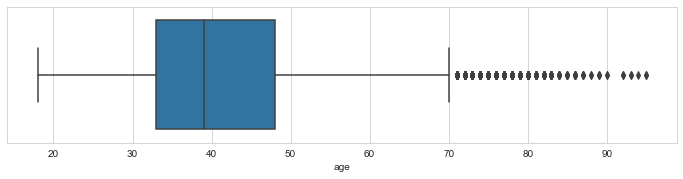

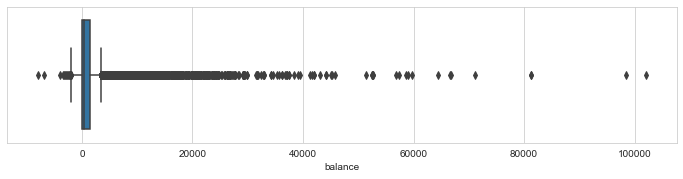

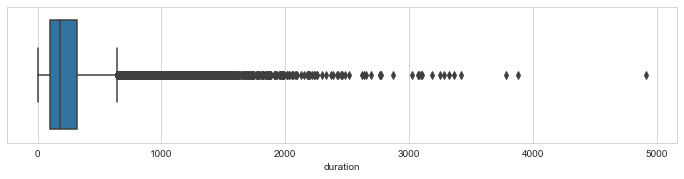

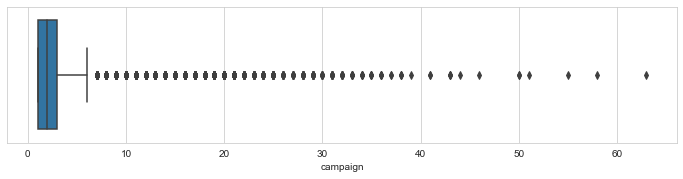

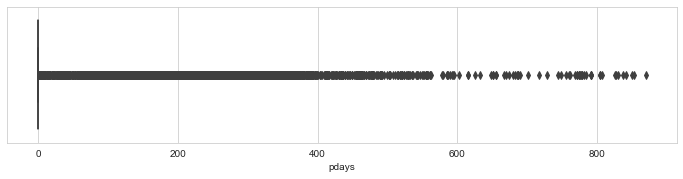

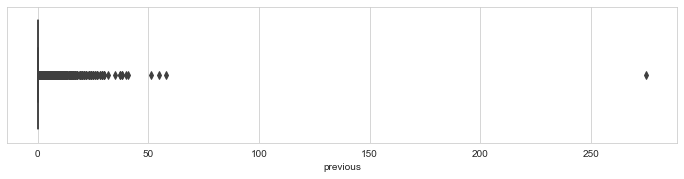

In [14]:
cols = ['age','balance','duration', 'campaign', 'pdays',
       'previous']

for col in cols:
    plt.figure(figsize=(12,2.5))
    sns.boxplot(df[col])
    plt.show()

#### Observations
- The age graph is almost normally distributed, with some outliers which are acceptable.
- Majority of customers have very low bank balances, and some have negative balances. There are several outliers, with many high bank balances, some going up to 100,000 as well.
- The duration feature has some extreme values of around 4000 to 5000 seconds, which is mor than one hour of contact. I will clip them to around 3000 seconds (50 mins) as they are very high and are outliers. Majority of customers fall within the 1000 seconds range (15 mins).
- The previous feature has one extreme outlier at almost 270 contacts, I will clip this as this seems too large.

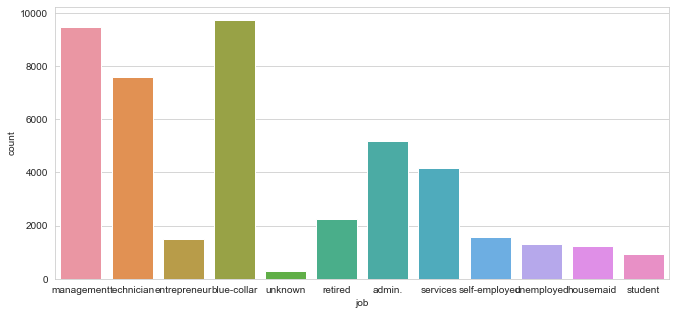

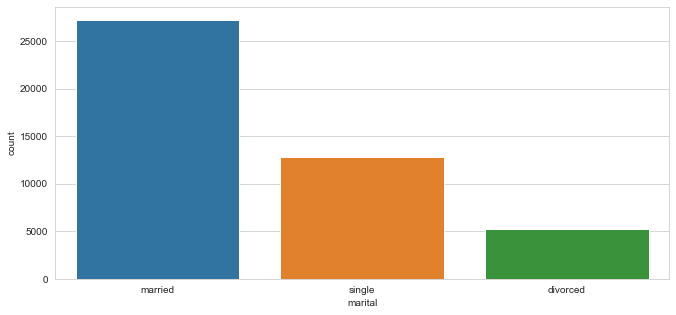

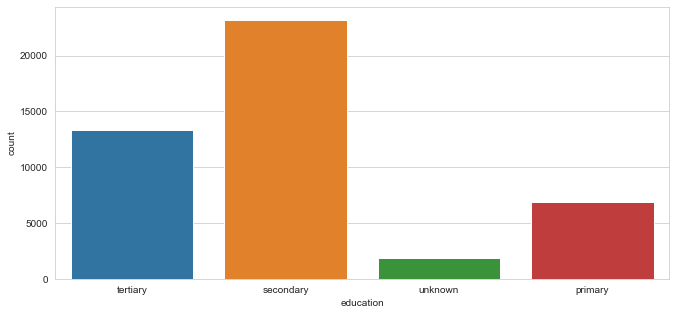

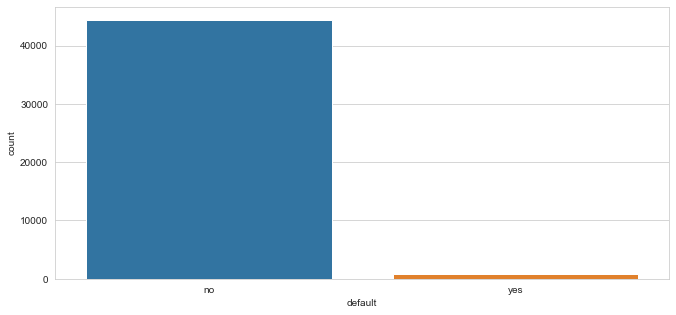

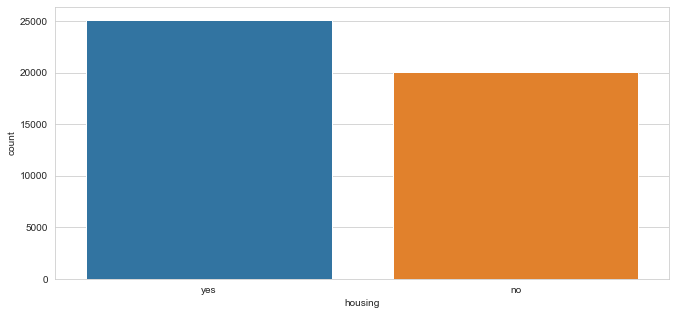

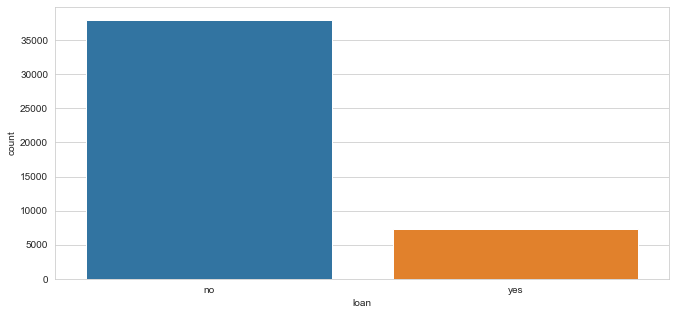

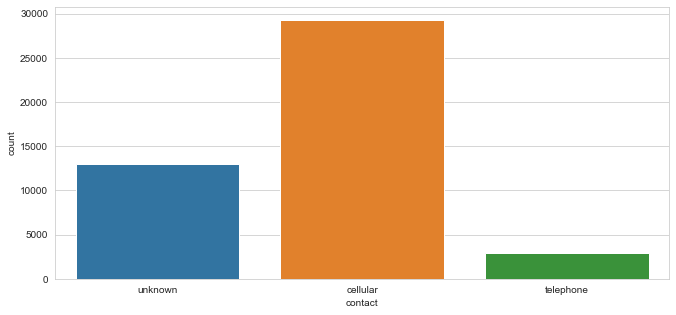

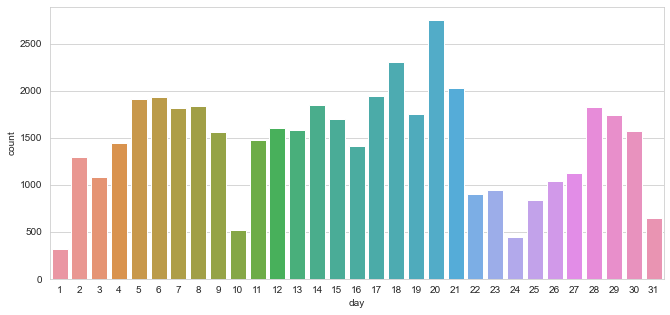

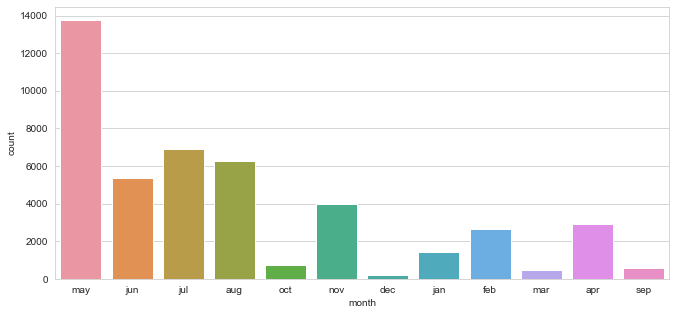

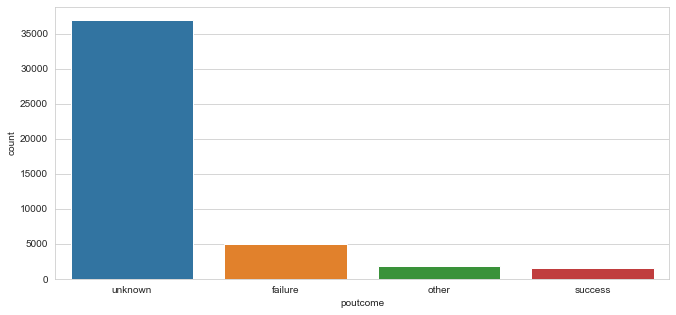

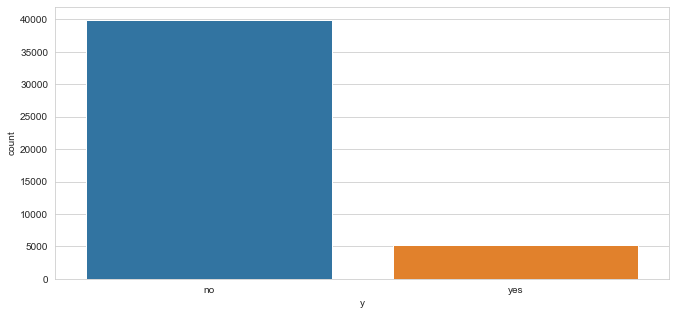

In [15]:
cols = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'poutcome', 'y']

for col in cols:
    plt.figure(figsize=(11,5))
    sns.countplot(df[col])
    plt.show()

# Outlier Treatment

#### I will perform the following treatments:
- Clip 'balance' to 80,000.
- Clip 'duration' to 3,000.
- Clip 'previous' to the second highest value.

In [16]:
df['balance'].clip(upper=80000, inplace=True)

In [17]:
df['duration'].clip(upper=3000, inplace=True)

In [18]:
df[df['previous']>50]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28886,31,management,single,tertiary,no,358,yes,no,cellular,30,jan,68,3,256,51,failure,no
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no
38326,46,blue-collar,married,primary,no,1085,yes,yes,cellular,15,may,523,2,353,58,other,yes
44089,37,technician,married,secondary,no,432,yes,no,cellular,6,jul,386,3,776,55,failure,yes


In [19]:
# Second highest value is 58, so we will use that as a ceiling
df['previous'].clip(upper=58, inplace=True)

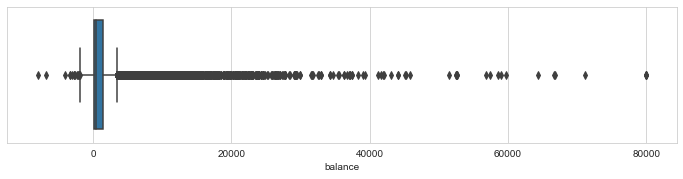

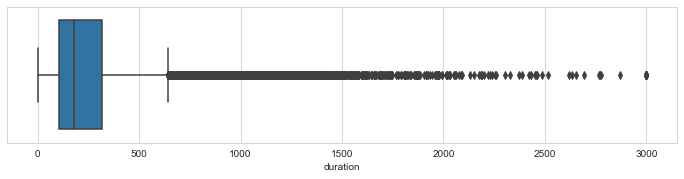

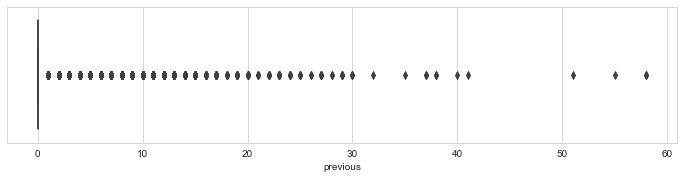

In [20]:
cols = ['balance', 'duration', 'previous']

for col in cols:
    plt.figure(figsize=(12,2.5))
    sns.boxplot(df[col])
    plt.show()

#### The boxplots look better, there are still many outliers but we will have to do with them.

# Other preprocessing

#### I will change the value 'unknown' in the poutcome feature for better interpretation.

In [23]:
df['poutcome'] = df['poutcome'].replace('unknown', 'not applicable')

In [24]:
df['poutcome'].value_counts()

not applicable    36959
failure            4901
other              1840
success            1511
Name: poutcome, dtype: int64